In [5]:
import chess
import chess.pgn as pgn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import copy
from matplotlib.pyplot import figure
import matplotlib

# Data ETL
**Caution: If the directory "./position-analysis" existed and had data, you can pass this part.**


This part is used to extract, transform and load data from the raw chess game data in order to create a new dataset

In [12]:
players = ['Caruana', 'Polgar', 'Fischer', 'Morphy', 'Botvinnik', 'Tal',
 'Kasparov', 'Anand', 'Carlsen', 'Nakamura', 'Alekhine', 'Capablanca']

In [13]:
chess_pieces_type = [i for i in range (1, 7)]
mapp = {1: [0] * 64, 2: [0] * 64, 3: [0] * 64, 4: [0] * 64, 5: [0] * 64, 6: [0] * 64}

for player in players:
  gameList = os.listdir('../raw_game/' + player)
  for game in gameList:
    gameLink = '../raw_game/' + player + '/' + game
    
    pgn = open(gameLink, encoding="utf-8")

    first_game = chess.pgn.read_game(pgn)
    board = first_game.board()
    

    for turn, move in enumerate(first_game.mainline_moves()):
      board.push(move)
      for piece in chess_pieces_type:
        li = list(board.pieces(piece_type=piece, color=True))
        # print(li)
        for i in li:
          mapp[piece][i] += 1

white_data = pd.DataFrame(mapp)
white_data.rename(columns = {1:'P', 2:'N', 3:'B', 4:'R', 5:'Q', 6:'K'}, inplace=True)

In [14]:
chess_pieces_type = [i for i in range (1, 7)]
mapp = {1: [0] * 64, 2: [0] * 64, 3: [0] * 64, 4: [0] * 64, 5: [0] * 64, 6: [0] * 64}

for player in players:
  gameList = os.listdir('../raw_game/' + player)
  for game in gameList:
    gameLink = '../raw_game/' + player + '/' + game
    
    pgn = open(gameLink)

    first_game = chess.pgn.read_game(pgn)
    board = first_game.board()
    

    for turn, move in enumerate(first_game.mainline_moves()):
      board.push(move)
      for piece in chess_pieces_type:
        li = list(board.pieces(piece_type=piece, color=False))
        # print(li)
        for i in li:
          mapp[piece][i] += 1

black_data = pd.DataFrame(mapp)
black_data.rename(columns = {1:'p', 2:'n', 3:'b', 4:'r', 5:'q', 6:'k'}, inplace=True)

In [15]:
piece_data = white_data.join(black_data)
piece_data.insert(loc=0, column = 'Square', value = range(0, len(piece_data)))
piece_data.to_csv('../results/csv/position-analysis.csv', index=False)

# Data EDA

In [6]:
piece_data = pd.read_csv("../results/csv/position-analysis.csv")

In [7]:
piece_data.describe()

,Square,P,N,B,R,Q,K,p,n,b,r,q,k
count,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000
mean,31.500000,1.618111e+05,30510.250000,34035.062500,43862.906250,19705.859375,27924.984375,1.613155e+05,30758.578125,34050.046875,43821.687500,19606.281250,27924.984375
std,18.618987,2.662915e+05,72898.152553,71857.005108,121351.318001,64468.863275,98718.521858,2.604973e+05,72060.841456,80732.009111,128639.054064,71050.921635,102295.573135
min,0.000000,0.000000e+00,192.000000,328.000000,2721.000000,770.000000,174.000000,0.000000e+00,149.000000,476.000000,2989.000000,664.000000,74.000000
25%,15.750000,1.876500e+03,2697.000000,3828.750000,6084.750000,3523.250000,903.500000,1.217250e+03,2040.250000,2754.750000,5450.750000,3073.500000,791.750000
50%,31.500000,3.506450e+04,6986.000000,8973.000000,9747.000000,5518.500000,3630.500000,2.442800e+04,7500.000000,7814.500000,9010.000000,5789.000000,3427.000000
75%,47.250000,1.882978e+05,20119.750000,27065.000000,14823.500000,13606.250000,11164.750000,2.356822e+05,21341.750000,21877.250000,13205.500000,12477.250000,11676.250000
max,63.000000,1.013422e+06,418422.000000,441167.000000,766010.000000,507827.000000,689945.000000,1.121826e+06,435996.000000,499455.000000,831051.000000,564510.000000,695153.000000


In [8]:
chess_pieces = ['P', 'R', 'N', 'B', 'Q', 'K', 
            'p', 'r', 'n', 'b', 'q', 'k']

columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
rows = [i for i in range(1, 9)]

sumOfChessPostion = piece_data.sum(axis=0)

# Calculate the probability of each postion with each piece
for piece in chess_pieces:
  piece_data[piece] = piece_data[piece] / sumOfChessPostion[piece]

# Transform sqare index to the actual position in board in order to make visual
piece_data['Row'] = piece_data['Square'].apply(
  lambda x: rows[int(x / 8)]
)

piece_data['Column'] = piece_data['Square'].apply(
  lambda x: columns[x % 8]
)


In [9]:
piece_data

,Square,P,N,B,R,Q,K,p,n,b,r,q,k,Row,Column
0,0,0.0,0.000336,0.001676,0.272871,0.002865,0.003624,0.0,0.000308,0.000336,0.002406,0.001925,0.000041,1,a
1,1,0.0,0.119210,0.005072,0.023654,0.005561,0.026968,0.0,0.000171,0.000547,0.001831,0.001744,0.000088,1,b
2,2,0.0,0.002276,0.202533,0.043615,0.008893,0.030687,0.0,0.000346,0.000687,0.002067,0.002039,0.000120,1,c
3,3,0.0,0.003741,0.003543,0.084050,0.402662,0.004468,0.0,0.000403,0.000692,0.002251,0.002257,0.000112,1,d
4,4,0.0,0.005187,0.004177,0.077090,0.011270,0.222594,0.0,0.000372,0.000620,0.001915,0.001984,0.000122,1,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,0.0,0.000541,0.000720,0.002649,0.002696,0.000185,0.0,0.004296,0.005581,0.054031,0.449880,0.006245,8,d
60,60,0.0,0.000524,0.000654,0.001915,0.001896,0.000171,0.0,0.010105,0.006502,0.061735,0.012758,0.249747,8,e
61,61,0.0,0.000342,0.000686,0.001236,0.001246,0.000150,0.0,0.008985,0.147185,0.140780,0.006074,0.024717,8,f
62,62,0.0,0.000098,0.000415,0.000969,0.000970,0.000118,0.0,0.071235,0.001004,0.009588,0.001048,0.388962,8,g


## Heatmap for Chess Piece Position

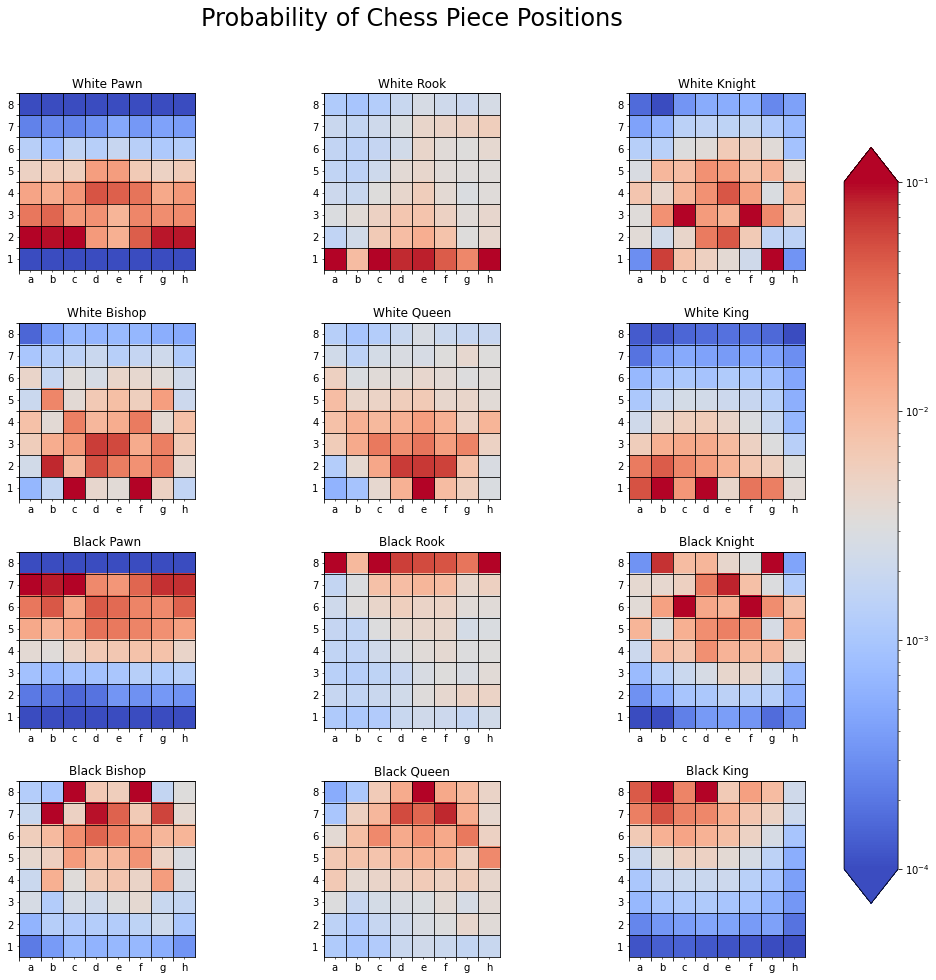

In [10]:
norm = colors.LogNorm(vmin=1e-4, vmax=1e-1) 
cmap = copy.copy(matplotlib.cm.get_cmap('coolwarm'))
cmap.set_bad(cmap(0))
titleOfPiece = {'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 'r': 'Rook', 'q': 'Queen', 'k': 'King'}

fig, ax = plt.subplots(4, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

iter = 0
for key in chess_pieces:
  this_ax = ax[np.unravel_index(iter, (4, 3))]
  iter += 1

  color = 'White' if (key.isupper()) else 'Black'
  title = color + ' ' + titleOfPiece[key.lower()]

  iloc = piece_data.columns.get_loc(key)
  data = piece_data.iloc[::-1,  iloc].to_numpy().reshape((8, 8))

  im = this_ax.imshow(data, norm = norm, cmap = cmap)
  
  this_ax.xaxis.set_major_formatter(ticker.NullFormatter())
  this_ax.xaxis.set_major_locator(ticker.FixedLocator([-0.5, 0.5,1.5,2.5,3.5,4.5,5.5, 6.5]))
  this_ax.xaxis.set_minor_locator(ticker.FixedLocator([0, 1, 2, 3, 4, 5, 6, 7]))
  this_ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']))

  this_ax.yaxis.set_major_formatter(ticker.NullFormatter())
  this_ax.yaxis.set_major_locator(ticker.FixedLocator([-0.5, 0.5,1.5,2.5,3.5,4.5,5.5, 6.5]))
  this_ax.yaxis.set_minor_locator(ticker.FixedLocator([0, 1, 2, 3, 4, 5, 6, 7]))
  this_ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['8', '7', '6', '5', '4', '3', '2', '1']))

  this_ax.set_title(title)
  this_ax.grid(color = 'black')


cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, extend = 'both', cax=cbar_ax)

fig.suptitle('Probability of Chess Piece Positions', fontsize = 24)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.3)

fig.patch.set_facecolor('white')
plt.show()

## Save position analysis to png file

In [ ]:
plt.savefig('../results/images/probability-chess-position.png', transparent=False)

# Một số phân tích liên quan tới vị trí quân cờ
Các quân tốt ở giữa có xu hướng tham gia kiểm soát trung tâm, đặc biệt là vị trí d4, e4 với tốt trắng và d5, e5 với tốt đen, các quân tốt còn lại không di chuyển nhiều để tạo hàng rào bảo vệ tướng. Cụ thể, các vị trí phổ biến của các quân cờ có thể phân tích

1. Xe tập trung di chuyển ở hàng 1 đối với xe trắng và hàng 8 đối với xe đen do khả năng di chuyển của xe.

2. Mã tham gia vào chiếm lĩnh trung tâm cùng với các tốt ở giữa, hai vị trí yêu thích của mã là c3, f3 đối với mã trắng và c6, f6 đối với mã đen

3. Tượng tập trung chiếm lĩnh các đường chéo lớn do khả năng di chuyển của tịnh.

4. Hậu di chuyển nhiều và đa dạng trên bàn cờ.

5. Vua hầu như đứng yên trong cả trận đấu, vua có hai vị trí yêu thích là vị trí ban đầu và vị trí sau khi nhập thành cánh xe.


## Position Score for each Chess Piece

Do đó, chúng em đề xuất cách tính điểm cho vị trí các quân cờ hình ảnh ở dưới.

In [11]:

blackPawnPScore = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

                   5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,

                   1.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0,

                   0.5, 0.5, 1.0, 2.5, 2.5, 1.0, 0.5, 0.5,

                   0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0,

                   0.5, 0.5, -1.0, 0.0, 0.0, -1.0, -0.5, 0.5,

                   0.5, 1.0, 1.0, -2.0, -2.0, 1.0, 1.0, 0.5,

                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

blackKnightPScore = [-5.0, -4.0, -3.0, 3.0, 3.0, 3.0, -4.0, -5.0,

                     -4.0, -2.0, 0.0, 0.0, 0.0, 0.0, -2.0, -4.0,

                     -3.0, 0.0, 1.0, 1.5, 1.5, 1.0, 0.0, -3.0,

                     -3.0, 0.5, 1.5, 2.0, 2.0, 1.5, 0.5, -3.0,

                     -3.0, 0.0, 1.5, 2.0, 2.0, 1.5, 0.0, -3.0,

                     -3.0, 0.5, 1.0, 1.5, 1.5, 1.0, 0.5, -3.0,

                     -4.0, -2.0, 0.0, 0.5, 0.5, 0.0, -2.0, -4.0,

                     -5.0, -4.0, 3.0, 3.0, 3.0, 3.0, 4.0, -5.0]

blackBishopPScore = [-2.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -2.0,

                     -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

                     -1.0, 0.0, 0.5, 1.0, 1.0, 0.5, 0.0, 1.0,

                     -1.0, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0,

                     -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0,

                     -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

                     -1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0,

                     -2.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -2.0]

blackRookPScore = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

                   0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5,

                   -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5,

                   -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5,

                   -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5,

                   -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5,

                   -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5,

                   0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0]

blackQueenPScore = [-2.0, -1.0, -1.0, -0.5, -0.5, -1.0, -1.0, -2.0,

                    -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

                    -1.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.0, 1.0,

                    -0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.0, -0.5,

                    0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.0, -0.5,

                    -1.0, 0.3, 0.5, 0.5, 0.5, 0.5, 0.0, -1.0,

                    -1.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 1.0,

                    -2.0, -1.0, -1.0, -0.5, -0.5, -1.0, -1.0, -2.0]

blackKingPScore = [-3.0, -4.0, -4.0, -5.0, -5.0, 4.0, -4.0, -3.0,

                   -3.0, 4.0, 4.0, -5.0, -5.0, -4.0, -4.0, -3.0,

                   -3.0, -4.0, -4.0, -5.0, -5.0, 4.0, -4.0, -3.0,

                   -3.0, -4.0, 4.0, -5.0, -5.0, -4.0, -4.0, -3.0,

                   -2.0, 3.0, 3.0, -4.0, 4.0, -3.0, -3.0, -2.0,

                   -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 1.0,

                   2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0,

                   2.0, 3.0, 1.0, 0.0, 0.0, 1.0, 3.0, 2]

whitePawnPScore = blackPawnPScore[::-1]
whiteKnightPScore = blackKnightPScore[::-1]
whiteBishopPScore = blackBishopPScore[::-1]
whiteRookPScore = blackRookPScore[::-1]
whiteQueenPScore = blackQueenPScore[::-1]
whiteKingPScore = blackKingPScore[::-1]

positionValueMaping = {'p': blackPawnPScore, 'n': blackKnightPScore, 'b': blackBishopPScore,
                       'r': blackRookPScore, 'q': blackQueenPScore, 'k': blackKingPScore,
                       'P': whitePawnPScore, 'N': whiteKnightPScore, 'B': whiteBishopPScore,
                       'R': whiteRookPScore, 'Q': whiteQueenPScore, 'K': whiteKingPScore}
